In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas import read_csv, concat
sns.set_theme(style='white', context='notebook', font_scale=1.33)

## Section 1: Design 1

- Sample size: 300 participants
- Task set: 15 items

In [2]:
## Locate and load files.
files = sorted([f for f in os.listdir('stan_results') if f.startswith('test')])
data = concat([read_csv(os.path.join('stan_results',f)) for f in files])

#### 1.1 Parameter recovery

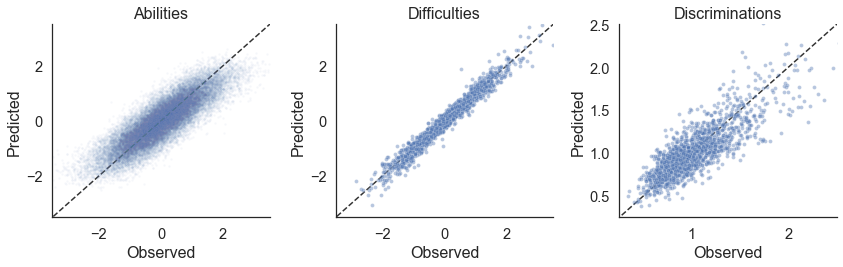

In [3]:
## Initialize canvas.
fig, axes = plt.subplots(1,3,figsize=(12,4))

## Plot subject abilities.
sns.scatterplot(x='obs', y='pred', data=data.query('param == "theta"'), s=5, alpha=0.05, ax=axes[0])
axes[0].plot([-5,5],[-5,5],color='0.2',linestyle='--',zorder=-1)
axes[0].set(xlim=(-3.5,3.5), xlabel='Observed', ylim=(-3.5,3.5), ylabel='Predicted', title='Abilities')

## Plot item difficulties.
sns.scatterplot(x='obs', y='pred', data=data.query('param == "beta"'), s=15, alpha=0.4, ax=axes[1])
axes[1].plot([-5,5],[-5,5],color='0.2',linestyle='--',zorder=-1)
axes[1].set(xlim=(-3.5,3.5), xlabel='Observed', ylim=(-3.5,3.5), ylabel='Predicted', title='Difficulties')

## Plot item discriminations.
sns.scatterplot(x='obs', y='pred', data=data.query('param == "alpha"'), s=15, alpha=0.4, ax=axes[2])
axes[2].plot([-5,5],[-5,5],color='0.2',linestyle='--',zorder=-1)
axes[2].set(xlim=(0.25,2.5), xlabel='Observed', ylim=(0.25,2.5), ylabel='Predicted', title='Discriminations')

sns.despine()
plt.tight_layout()

#### 1.2 Recovery consistency 

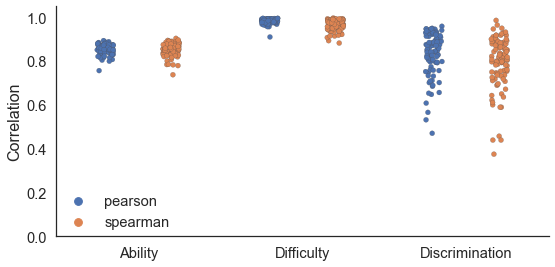

In [4]:
## Initialize canvas.
fig, ax = plt.subplots(1,1,figsize=(8,4))

## Compute correlations.
f = lambda x, method: x[['obs','pred']].corr(method).iloc[0,1]
df1 = data.groupby(['param','seed']).apply(f, 'pearson').reset_index().rename(columns={0:'pearson'})
df2 = data.groupby(['param','seed']).apply(f, 'spearman').reset_index().rename(columns={0:'spearman'})
corr = df1.merge(df2).melt(id_vars=['param','seed'], var_name='method', value_name='corr')

## Plot correlations.
sns.stripplot(x='param', y='corr', hue='method', data=corr, order=['theta','beta','alpha'],
              hue_order=['pearson','spearman'], dodge=True, size=5, linewidth=0.2, ax=ax)

## Add details.
ax.set(xlabel='', xticklabels=[r'Ability','Difficulty','Discrimination'], 
       ylim=(0,1.05), ylabel='Correlation')
ax.legend(loc=3, frameon=False, borderpad=0)

sns.despine()
plt.tight_layout()

#### 1.3 Recovery bias / variance

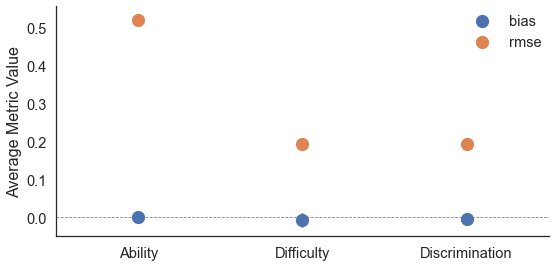

In [5]:
## Initialize canvas.
fig, ax = plt.subplots(1,1,figsize=(8,4))

## Compute bias.
bias = lambda x: (x.pred - x.obs).mean()
bias = data.groupby(['param','seed']).apply(bias).reset_index().rename(columns={0:'bias'})

## Compute variance.
rmse = lambda x: np.sqrt(np.mean(np.square(x.pred - x.obs)))
rmse = data.groupby(['param','seed']).apply(rmse).reset_index().rename(columns={0:'rmse'})

## Merge DataFrames.
metrics = bias.merge(rmse).melt(id_vars=['param','seed'], var_name='metric', value_name='value')

## Plot metrics.
sns.pointplot(x='param', y='value', hue='metric', data=metrics, join=False, scale=1.5,
              order=['theta','beta','alpha'], hue_order=['bias','rmse'], ax=ax)
ax.axhline(0, color='0.5', lw=0.8, linestyle='--', zorder=-1)

## Add details.
ax.set(xlabel='', xticklabels=[r'Ability','Difficulty','Discrimination'], ylabel='Average Metric Value')
ax.legend(loc=1, frameon=False, borderpad=0)

sns.despine()
plt.tight_layout()